In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

rawannawi ki
tvoroyri fo
hobart au
tiksi ru
palmas br
bethel us
parsons us
yellowknife ca
college us
eydhafushi mv
barentsburg sj
scarborough tt
puerto ayora ec
teguldet ru
bluff nz
isangel vu
punta arenas cl
ust-maya ru
bathsheba bb
barrow us
new norfolk au
ushuaia ar
madisonville us
dicabisagan ph
new norfolk au
berbera so
avarua ck
marawi sd
qaanaaq gl
new norfolk au
klaksvik fo
katobu id
orlovka ru
cabo san lucas mx
kavaratti in
qasigiannguit gl
belushya guba ru
port alfred za
pilikwe bw
gamba ga
trat th
albany au
bredasdorp za
mahaicony gy
kodiak us
rikitea pf
yerbogachen ru
vardo no
rikitea pf
vaini to
krasnyy chikoy ru
finschhafen pg
mandalgovi mn
ushuaia ar
san carlos de bariloche ar
caconda ao
hvide sande dk
severo-kurilsk ru
busselton au
kruisfontein za
thompson ca
skelleftea se
mataura pf
bambous virieux mu
belushya guba ru
shelburne ca
chokurdakh ru
lebu cl
olafsvik is
arman ru
biggar ca
hobart au
butaritari ki
de-kastri ru
yellowknife ca
victoria sc
sinkat sd
ribeira grand

vaini to
tsihombe mg
jamestown sh
palabuhanratu id
korla cn
carutapera br
busselton au
saint-philippe re
cherskiy ru
taolanaro mg
taolanaro mg
upernavik gl
margate za
laziska gorne pl
buala sb
ciras af
solovetskiy ru
rawson ar
toliary mg
imbituba br
black forest us
punta arenas cl
griffith au
imbituba br
lebu cl
avarua ck
shingu jp
tuy hoa vn
busselton au
busselton au
cabo san lucas mx
kailua us
vaitape pf
hilo us
karkaralinsk kz
balakirevo ru
rikitea pf
maragogi br
isangel vu
iwanai jp
rikitea pf
port alfred za
punta arenas cl
punta arenas cl
pacific grove us
marcona pe
acapulco mx
esperance au
bredasdorp za
quatre cocos mu
yellowknife ca
punta arenas cl
torbay ca
saskylakh ru
ushuaia ar
ilulissat gl
ushuaia ar
albany au
nikolskoye ru
oksfjord no
timmins ca
jamestown sh
rikitea pf
broome au
bredasdorp za
bluff nz
ushuaia ar
phan rang vn
busselton au
bluff nz
voznesenskoye ru
mataura pf
bethel us
rikitea pf
riihimaki fi
padang id
lagoa pt
redcar gb
mataura pf
atuona pf
concordia ar
lav

beringovskiy ru
ribeira grande pt
ribeira grande pt
kodiak us
kapaa us
nizhneyansk ru
saskylakh ru
bizhbulyak ru
sitka us
chuy uy
mykolayiv ua
rikitea pf
qasigiannguit gl
dongsheng cn
bethel us
bluff nz
cabo san lucas mx
midland us
poum nc
barrow us
kapaa us
guiyang cn
bubaque gw
georgetown sh
vaini to
nikolskoye ru
cidreira br
albany au
bredasdorp za
mancio lima br
hermanus za
vila velha br
begoro gh
bethanien na
vaini to
kahului us
kibondo tz
jumla np
taolanaro mg
busselton au
paucartambo pe
busselton au
nome us
jamestown sh
hermanus za
muravlenko ru
jalu ly
kamenka ru
kushmurun kz
padang id
rikitea pf
rikitea pf
cape town za
mogadishu so
dossor kz
punta arenas cl
rikitea pf
hilo us
mayor pablo lagerenza py
geraldton au
vysokogornyy ru
rikitea pf
port alfred za
ushuaia ar
esperance au
shouguang cn


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime



In [15]:
# Run an API request for each of the cities.
# Create an empty list to hold the weather data.

city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 2 of Set 1 | tvoroyri
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | palmas
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | parsons
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | eydhafushi
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | scarborough
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | teguldet
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | isangel
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | ust-maya
Processing Record 19 of Set 1 | bathsheba
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of S

Processing Record 35 of Set 4 | dwarka
Processing Record 36 of Set 4 | yulara
Processing Record 37 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 38 of Set 4 | omboue
Processing Record 39 of Set 4 | norman wells
Processing Record 40 of Set 4 | jaipur
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | sioux lookout
Processing Record 43 of Set 4 | karaton
Processing Record 44 of Set 4 | aflu
City not found. Skipping...
Processing Record 45 of Set 4 | halalo
City not found. Skipping...
Processing Record 46 of Set 4 | dekar
Processing Record 47 of Set 4 | vostok
Processing Record 48 of Set 4 | imbituba
Processing Record 49 of Set 4 | itoman
Processing Record 50 of Set 4 | synya
Processing Record 1 of Set 5 | maltahohe
Processing Record 2 of Set 5 | severnoye
Processing Record 3 of Set 5 | yirol
City not found. Skipping...
Processing Record 4 of Set 5 | sorong
Processing Record 5 of Set 5 | galgani
City not found. Skipping...
Processing Record

Processing Record 19 of Set 8 | black forest
Processing Record 20 of Set 8 | vaitape
Processing Record 21 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 22 of Set 8 | balakirevo
Processing Record 23 of Set 8 | maragogi
Processing Record 24 of Set 8 | iwanai
Processing Record 25 of Set 8 | marcona
City not found. Skipping...
Processing Record 26 of Set 8 | acapulco
Processing Record 27 of Set 8 | torbay
Processing Record 28 of Set 8 | ilulissat
Processing Record 29 of Set 8 | nikolskoye
Processing Record 30 of Set 8 | oksfjord
Processing Record 31 of Set 8 | timmins
Processing Record 32 of Set 8 | phan rang
City not found. Skipping...
Processing Record 33 of Set 8 | voznesenskoye
Processing Record 34 of Set 8 | riihimaki
Processing Record 35 of Set 8 | padang
Processing Record 36 of Set 8 | redcar
Processing Record 37 of Set 8 | concordia
Processing Record 38 of Set 8 | lavrentiya
Processing Record 39 of Set 8 | swan hill
Processing Record 40 of Set 8 | havre-sain

Processing Record 7 of Set 12 | artyk
City not found. Skipping...
Processing Record 8 of Set 12 | aranos
Processing Record 9 of Set 12 | sao gabriel
Processing Record 10 of Set 12 | nepomuceno
Processing Record 11 of Set 12 | akdepe
Processing Record 12 of Set 12 | namibe
Processing Record 13 of Set 12 | san pedro
Processing Record 14 of Set 12 | verdalsora
City not found. Skipping...
Processing Record 15 of Set 12 | sept-iles
Processing Record 16 of Set 12 | robertson
Processing Record 17 of Set 12 | coihaique
Processing Record 18 of Set 12 | pasni
Processing Record 19 of Set 12 | kapit
Processing Record 20 of Set 12 | pitimbu
Processing Record 21 of Set 12 | vila velha
Processing Record 22 of Set 12 | camacha
Processing Record 23 of Set 12 | hami
Processing Record 24 of Set 12 | dauriya
Processing Record 25 of Set 12 | state college
Processing Record 26 of Set 12 | guozhen
Processing Record 27 of Set 12 | staryy nadym
Processing Record 28 of Set 12 | storsteinnes
Processing Record 29

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tvoroyri,61.5556,-6.8111,49.39,89,100,26.57,FO,2021-11-06 18:31:37
1,Hobart,-42.8794,147.3294,53.46,65,75,4.00,AU,2021-11-06 18:26:44
2,Tiksi,71.6872,128.8694,-4.09,93,68,13.94,RU,2021-11-06 18:31:37
3,Palmas,-10.2128,-48.3603,84.07,74,40,4.61,BR,2021-11-06 18:31:38
4,Bethel,41.3712,-73.4140,53.89,45,1,1.01,US,2021-11-06 18:30:41
5,Parsons,37.3403,-95.2611,61.99,51,0,12.97,US,2021-11-06 18:31:38
6,Yellowknife,62.4560,-114.3525,31.41,99,75,9.22,CA,2021-11-06 18:30:04
7,College,64.8569,-147.8028,26.55,88,75,0.00,US,2021-11-06 18:31:39
8,Eydhafushi,5.1033,73.0708,81.99,77,81,15.12,MV,2021-11-06 18:31:39
9,Scarborough,54.2797,-0.4044,55.51,86,72,4.00,GB,2021-11-06 18:30:32


In [22]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [23]:
city_data_df=city_data_df[new_column_order]

In [24]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tvoroyri,FO,2021-11-06 18:31:37,61.5556,-6.8111,49.39,89,100,26.57
1,Hobart,AU,2021-11-06 18:26:44,-42.8794,147.3294,53.46,65,75,4.00
2,Tiksi,RU,2021-11-06 18:31:37,71.6872,128.8694,-4.09,93,68,13.94
3,Palmas,BR,2021-11-06 18:31:38,-10.2128,-48.3603,84.07,74,40,4.61
4,Bethel,US,2021-11-06 18:30:41,41.3712,-73.4140,53.89,45,1,1.01
5,Parsons,US,2021-11-06 18:31:38,37.3403,-95.2611,61.99,51,0,12.97
6,Yellowknife,CA,2021-11-06 18:30:04,62.4560,-114.3525,31.41,99,75,9.22
7,College,US,2021-11-06 18:31:39,64.8569,-147.8028,26.55,88,75,0.00
8,Eydhafushi,MV,2021-11-06 18:31:39,5.1033,73.0708,81.99,77,81,15.12
9,Scarborough,GB,2021-11-06 18:30:32,54.2797,-0.4044,55.51,86,72,4.00


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

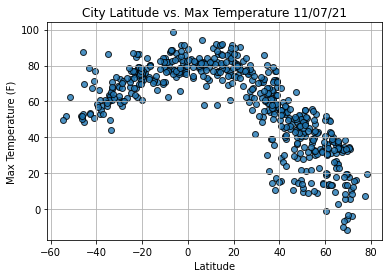

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

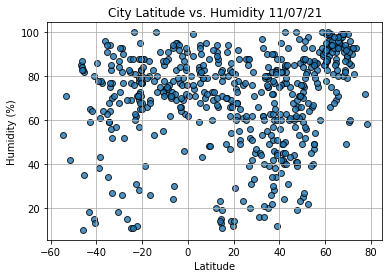

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

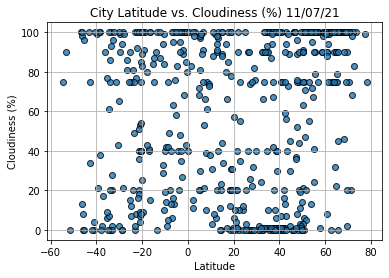

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

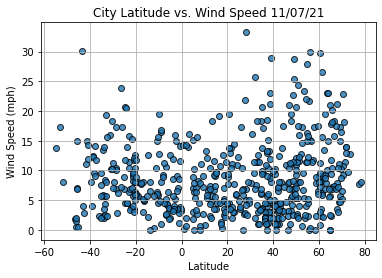

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()